In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_case_storage="C://Users//Antoine//Documents//Ecole des Ponts//Cours 3A//Oliver Wymann//parkmeter_coords.h5"

In [3]:
def list_HDF_file(file_name):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        result = store.keys()   
    return result

def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        return store[table]

In [4]:
# Extracting the parkmeter coordinates and deleting the duplicates
parkmeter_data = read_HDF_file(data_case_storage,"/parkmeter_coordinates")

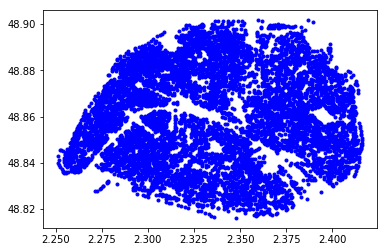

In [5]:
# Printing stuff
# print(type(parkmeter_coordinates))
# print(parkmeter_coordinates.shape)
# print(parkmeter_coordinates.head(10))

# Each line of the 'parkmeter_coordinates' series is a str
# Transforms them into a proper array
coords = np.array([np.fromstring(coords_line, dtype=np.float64, sep=", ") for coords_line in parkmeter_data['parkmeter_coordinates']])

plt.plot(coords[:, 1], coords[:, 0], 'b.')
plt.show()